# Project7 – Product review analytics using text classification

__Objective__ – Objective of the project is to classify a product review as positive or negative using text mining and classification. The X variables are the review title and review text and the Y variable is a label of Negative and Positive.

## Project instructions
1.	Perform text clean up and pre-processing to use the tweets as the input variable for the classification model.
2.	Perform exploratory analysis and text visualisation to show insights on words / word associations that occur in negative and positive reviews.
3.	Divide the given data into train and test sets and build a prediction model to classify a review as positive or negative.
4.	Evaluate the model based on model performance measures for classification and recommend the most suitable model.
5.	Give your set of actionable insights on what customer preferences are based on the models built and feature importance from the models.


## About the dataset
The dataset consists of 20000 reviews and a review class of positive or negative for each of the reviews. The Y variable is the review class.

In [1]:
import pandas as pd

review = pd.read_csv('reviews1.csv')
review.head()

,Review_class,review_text
0,Positive,This sound track was beautiful! It paints the ...
1,Positive,I'm reading a lot of reviews saying that this ...
2,Positive,This soundtrack is my favorite music of all ti...
3,Positive,I truly like this soundtrack and I enjoy video...
4,Positive,"If you've played the game, you know how divine..."


In [2]:
review.shape

(20000, 2)

# EDA

In [3]:
review.isnull().sum()

Review_class    0
review_text     0
dtype: int64

In [4]:
review['Review_class'].value_counts()

Positive    10257
Negative     9743
Name: Review_class, dtype: int64

In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
Review_class    20000 non-null object
review_text     20000 non-null object
dtypes: object(2)
memory usage: 312.6+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

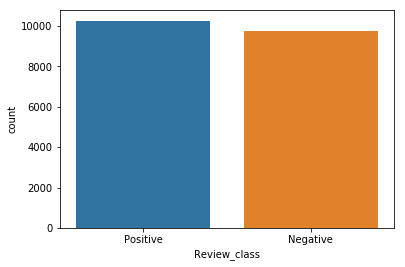

In [7]:
sns.countplot(review['Review_class'])
plt.show()

### Word cloud of positive reviews

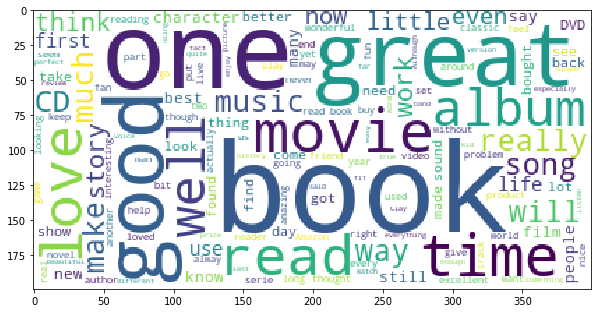

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wc = WordCloud(background_color='WHITE').generate(' '.join(review[review['Review_class']=='Positive']['review_text']))
plt.figure(figsize=(10,6))
plt.imshow(wc)

### Word cloud of negative reviews

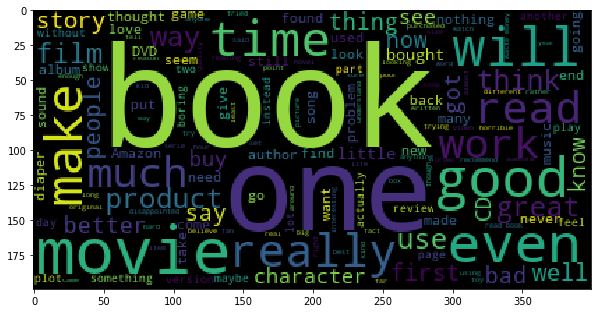

In [9]:
wc = WordCloud(background_color='BLACK').generate(' '.join(review[review['Review_class']=='Negative']['review_text']))
plt.figure(figsize=(10,6))
plt.imshow(wc)

# Document Term Matrix

In [10]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

review['Review_class']=review.Review_class.map({'Positive':1, 'Negative':0})

review.head()

,Review_class,review_text
0,1,This sound track was beautiful! It paints the ...
1,1,I'm reading a lot of reviews saying that this ...
2,1,This soundtrack is my favorite music of all ti...
3,1,I truly like this soundtrack and I enjoy video...
4,1,"If you've played the game, you know how divine..."


In [11]:
review.Review_class.value_counts()

1    10257
0     9743
Name: Review_class, dtype: int64

### TEXT CLEANING

In [12]:
docs=review['review_text'].str.lower()
docs=review['review_text'].str.replace('[^a-z ]',' ')
stopwords = nltk.corpus.stopwords.words('english')
custom_stop_words = []
stopwords.extend(custom_stop_words)
stemmer = nltk.stem.SnowballStemmer('english')

def clean_sentence(text):
    words = text.split(' ')
    clean_words = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(clean_words)


review['clean_txt'] = docs.apply(clean_sentence)
review.head()

,Review_class,review_text,clean_txt
0,1,This sound track was beautiful! It paints the ...,sound track beauti paint seneri mind well ...
1,1,I'm reading a lot of reviews saying that this ...,read lot review say best game soundtrack ...
2,1,This soundtrack is my favorite music of all ti...,soundtrack favorit music time hand intens ...
3,1,I truly like this soundtrack and I enjoy video...,truli like soundtrack enjoy video game mus...
4,1,"If you've played the game, you know how divine...",f play game know divin music singl song te...


## Count Vectoriser

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

train, validate = train_test_split(review['clean_txt'], test_size=0.3, random_state=100)

vectorizer = CountVectorizer(min_df=50)
vectorizer.fit(train)

train_dtm = vectorizer.transform(train)
validate_dtm = vectorizer.transform(validate)

In [14]:
train_x = train_dtm
validate_x = validate_dtm

train_y = review.loc[train.index]['Review_class']
validate_y = review.loc[validate.index]['Review_class']

## Model Selection

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [16]:
model_dt = DecisionTreeClassifier()
model_dt.fit(train_x , train_y)
pred_dt = model_dt.predict(validate_x)
accuracy_dt = accuracy_score(validate_y,pred_dt)
recall_dt = recall_score(validate_y,pred_dt)
precision_dt = precision_score(validate_y,pred_dt)


model_rf = RandomForestClassifier()
model_rf.fit(train_x , train_y)
pred_rf = model_rf.predict(validate_x)
accuracy_rf = accuracy_score(validate_y,pred_rf)
recall_rf = recall_score(validate_y,pred_rf)
precision_rf = precision_score(validate_y,pred_rf)

model_nb = MultinomialNB()
model_nb.fit(train_x , train_y)
pred_nb = model_nb.predict(validate_x)
accuracy_nb = accuracy_score(validate_y,pred_nb)
recall_nb = recall_score(validate_y,pred_nb)
precision_nb = precision_score(validate_y,pred_nb)

model_lg = LogisticRegression()
model_lg.fit(train_x , train_y)
pred_lg = model_lg.predict(validate_x)
accuracy_lg = accuracy_score(validate_y,pred_lg)
recall_lg = recall_score(validate_y,pred_lg)
precision_lg = precision_score(validate_y,pred_lg)

C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
result = pd.DataFrame({'Method':['Decision Trees','Random Forest','Multinomial Naive Bayes','Logistic Regression'],
                       'Accuracy':[accuracy_dt,accuracy_rf,accuracy_nb,accuracy_lg],
                       'Recall Score':[recall_dt,recall_rf,recall_nb,recall_lg],
                      'Precision Score':[precision_dt,precision_rf,precision_nb,precision_lg]})
result

,Method,Accuracy,Recall Score,Precision Score
0,Decision Trees,0.698500,0.720779,0.700536
1,Random Forest,0.758000,0.732792,0.782051
2,Multinomial Naive Bayes,0.796833,0.812338,0.796055
3,Logistic Regression,0.811167,0.827922,0.808754


## Word2Vec

In [18]:
path = 'C:/Users/Ravi Sreedhar/Downloads/GL DSEFT/Class Resources/GoogleNews-vectors-negative300.bin'
import gensim
embeddings = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)
embeddings

C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [19]:
txt = review['review_text'].str.replace('[^a-zA-Z ]','')
docs_vectors = pd.DataFrame()
for doc in txt:
    temp = pd.DataFrame()
    words = doc.split(' ')
    for word in words:
        try:
            word2vec = embeddings[word]
            temp = temp.append(pd.Series(word2vec), ignore_index=True)
        except:
            pass
    doc_vector = temp.mean()
    docs_vectors = docs_vectors.append(doc_vector, ignore_index=True)

docs_vectors

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.028583,0.043140,0.038560,0.076056,-0.035045,0.021395,0.020961,-0.084628,0.043283,0.078600,...,-0.085759,0.055860,-0.109867,0.017982,-0.030701,0.006453,0.049406,-0.033689,0.016732,-0.014259
1,0.043968,0.017642,0.044759,0.099973,-0.047085,0.037407,0.044412,-0.084080,0.081120,0.069771,...,-0.091308,0.056144,-0.084132,0.040327,-0.000616,-0.026898,0.002181,-0.036848,0.036567,-0.027983
2,0.041934,0.012147,0.025337,0.081884,-0.008269,0.000570,0.015025,-0.062424,0.077753,0.078786,...,-0.063273,0.039579,-0.113557,0.008264,-0.006406,-0.024932,-0.018008,-0.043509,0.021695,-0.022032
3,0.068580,0.009556,0.008539,0.066256,0.030427,0.016744,-0.017652,-0.024999,0.051113,0.125446,...,-0.064500,-0.005959,-0.129144,-0.007202,0.007848,-0.064702,-0.009872,-0.059359,0.029316,-0.009743
4,0.047046,0.016327,0.028651,0.039828,-0.038121,0.031566,0.036956,-0.041013,0.065228,0.047919,...,-0.037979,0.020394,-0.102557,0.000703,-0.020334,-0.010128,0.009794,-0.053807,0.010947,0.011972
5,0.058595,-0.006897,0.022277,0.088198,-0.046956,-0.002612,0.026326,-0.048506,0.078949,0.063133,...,-0.066290,0.029489,-0.082896,0.012371,-0.006057,-0.020368,0.006710,-0.058079,0.030136,-0.018672
6,0.041898,0.006667,0.029283,0.108136,-0.049872,0.023822,0.022400,-0.046545,0.059294,0.065232,...,-0.080128,0.036458,-0.092737,0.009633,-0.033880,-0.036727,0.016990,-0.037645,0.039854,-0.029686
7,0.042945,0.007125,0.035710,0.097709,-0.047765,0.030807,0.054202,-0.053881,0.061739,0.086769,...,-0.080973,0.038179,-0.121041,0.019363,-0.037984,-0.038036,0.018046,-0.048446,0.060426,-0.018278
8,0.067084,0.027527,0.047784,0.111958,-0.023752,-0.000047,0.037200,-0.047671,0.076041,0.063986,...,-0.069337,0.043029,-0.133820,-0.007028,-0.020873,-0.038086,-0.001336,-0.061651,0.028402,-0.014038
9,0.040472,0.020928,0.018828,0.102722,-0.054238,-0.017408,0.025133,-0.022577,0.070489,0.080490,...,-0.092999,0.062668,-0.083087,0.011106,-0.046758,-0.035913,0.029366,-0.041928,0.019783,-0.066196


In [20]:
docs_vectors_imputed = docs_vectors.fillna(docs_vectors.mean())
docs_vectors_imputed.index = review.index
train, validate = train_test_split(docs_vectors_imputed, test_size=0.3, random_state=300)
train_x = train
train_y = review.loc[train.index]['Review_class']
validate_x = validate
validate_y = review.loc[validate.index]['Review_class']

In [21]:
model_dt = DecisionTreeClassifier()
model_dt.fit(train_x , train_y)
pred_dt = model_dt.predict(validate_x)
accuracy_dt = accuracy_score(validate_y,pred_dt)
recall_dt = recall_score(validate_y,pred_dt)
precision_dt = precision_score(validate_y,pred_dt)


model_rf = RandomForestClassifier()
model_rf.fit(train_x , train_y)
pred_rf = model_rf.predict(validate_x)
accuracy_rf = accuracy_score(validate_y,pred_rf)
recall_rf = recall_score(validate_y,pred_rf)
precision_rf = precision_score(validate_y,pred_rf)


model_lg = LogisticRegression()
model_lg.fit(train_x , train_y)
pred_lg = model_lg.predict(validate_x)
accuracy_lg = accuracy_score(validate_y,pred_lg)
recall_lg = recall_score(validate_y,pred_lg)
precision_lg = precision_score(validate_y,pred_lg)

C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

bagg = BaggingClassifier()

bagmodel = bagg.fit(train_x,train_y)

pred_bag = bagmodel.predict(validate_x)

accuracy_bag = accuracy_score(validate_y,pred_bag)
recall_bag = recall_score(validate_y,pred_bag)
precision_bag = precision_score(validate_y,pred_bag)

ada = AdaBoostClassifier()

ada.fit(train_x,train_y)

pred_ada = ada.predict(validate_x)

accuracy_ada = accuracy_score(validate_y,pred_ada)
recall_ada = recall_score(validate_y,pred_ada)
precision_ada = precision_score(validate_y,pred_ada)

gb = GradientBoostingClassifier()

gb.fit(train_x,train_y)

pred_gb = gb.predict(validate_x)

accuracy_gb = accuracy_score(validate_y,pred_gb)
recall_gb = recall_score(validate_y,pred_gb)
precision_gb = precision_score(validate_y,pred_gb)

In [23]:
result = pd.DataFrame({'Method':['Decision Trees','Random Forest','Logistic Regression','Bagging','Adaboost','Gradient boosting'],
                       'Accuracy':[accuracy_dt,accuracy_rf,accuracy_lg,accuracy_bag,accuracy_ada,accuracy_gb],
                       'Recall Score':[recall_dt,recall_rf,recall_lg,recall_bag,recall_ada,recall_gb],
                      'Precision Score':[precision_dt,precision_rf,precision_lg,precision_bag,precision_ada,precision_gb]})
result

,Method,Accuracy,Recall Score,Precision Score
0,Decision Trees,0.632500,0.637959,0.642764
1,Random Forest,0.692167,0.633409,0.730510
2,Logistic Regression,0.808167,0.794280,0.825118
3,Bagging,0.700000,0.649984,0.734484
4,Adaboost,0.751500,0.754631,0.759320
5,Gradient boosting,0.774667,0.776731,0.782324


In [25]:
from sklearn.model_selection import GridSearchCV

boost_param = {
    "n_estimators" : [25,50,100],
    "learning_rate" : [1,2],
    "loss" : [ 'deviance', 'exponential'],
    "random_state" : [123]
}

grid_boost = GridSearchCV(gb,boost_param,cv=5)

grid_boost.fit(train_x,train_y)

grid_boost.best_params_

{'learning_rate': 1,
 'loss': 'exponential',
 'n_estimators': 100,
 'random_state': 123}

In [26]:
tuned_gb = GradientBoostingClassifier( learning_rate =1,
 loss = 'exponential',
 n_estimators = 100,
 random_state = 123)

tuned_gb.fit(train_x,train_y)

pred_gb = tuned_gb.predict(validate_x)

accuracy_gb = accuracy_score(validate_y,pred_gb)
recall_gb = recall_score(validate_y,pred_gb)
precision_gb = precision_score(validate_y,pred_gb)

In [27]:
from sklearn.ensemble import VotingClassifier

vote = VotingClassifier([('Logistic Reg',model_lg),('Adaboost',ada),('Grad Boosting Tuned',tuned_gb)],voting='hard')
vote.fit(train_x,train_y)
pred_vote = vote.predict(validate_x)
accuracy_vote = accuracy_score(validate_y,pred_vote)
recall_vote = recall_score(validate_y,pred_vote)
precision_vote = precision_score(validate_y,pred_vote)

C:\Users\Ravi Sreedhar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
result_3 = pd.DataFrame({'Method':['Tuned Gradient boosting','Vote of LG, ADA and GB'],
                       'Accuracy':[accuracy_gb,accuracy_vote],
                       'Recall Score':[recall_gb,recall_vote],
                      'Precision Score':[precision_gb,precision_vote]})

result4 = pd.concat([result,result_3])
result4

,Method,Accuracy,Recall Score,Precision Score
0,Decision Trees,0.632500,0.637959,0.642764
1,Random Forest,0.692167,0.633409,0.730510
2,Logistic Regression,0.808167,0.794280,0.825118
3,Bagging,0.700000,0.649984,0.734484
4,Adaboost,0.751500,0.754631,0.759320
5,Gradient boosting,0.774667,0.776731,0.782324
0,Tuned Gradient boosting,0.781333,0.780955,0.790201
1,"Vote of LG, ADA and GB",0.799333,0.795255,0.809997


In [29]:
result4.to_csv('W2V results.csv')